# Import library

In [48]:
import pandas as pd
import numpy as np
import datetime
import requests
import warnings

from datetime import datetime, date 

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import seaborn as sns
#import squarify
#import plotly.offline as py
#import plotly_express as px

#from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
#from fbprophet import Prophet
#from fbprophet.plot import plot_plotly, add_changepoints_to_plot

from IPython.display import Image
warnings.filterwarnings('ignore')
%matplotlib inline
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from statsmodels.tsa.stattools import adfuller


# Load Data

In [49]:
# World
df = pd.read_csv("/Users/vibuitruong/Documents/VEF Academy/final_project/owid-covid-data.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97120,ZWE,Africa,Zimbabwe,2021-06-16,40556.0,238.0,160.571,1640.0,3.0,2.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
97121,ZWE,Africa,Zimbabwe,2021-06-17,40927.0,371.0,204.429,1647.0,7.0,3.000,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
97122,ZWE,Africa,Zimbabwe,2021-06-18,41335.0,408.0,235.286,1656.0,9.0,3.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
97123,ZWE,Africa,Zimbabwe,2021-06-19,41628.0,293.0,253.714,1666.0,10.0,4.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [50]:
df3 = pd.read_csv("/Users/vibuitruong/Documents/VEF Academy/final_project/owid-covid-latest.csv")
df3

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2021-06-19,98734.0,0.0,1427.714,3934.0,0.0,69.286,...,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,NaN
1,OWID_AFR,NaN,Africa,2021-06-19,5178520.0,25173.0,21979.714,137081.0,443.0,384.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,Europe,Albania,2021-06-19,132488.0,4.0,5.571,2454.0,0.0,0.143,...,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,NaN
3,DZA,Africa,Algeria,2021-06-19,135586.0,367.0,359.429,3624.0,9.0,8.429,...,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,NaN
4,AND,Europe,Andorra,2021-06-19,13842.0,0.0,4.143,127.0,0.0,0.000,...,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,WLF,Oceania,Wallis and Futuna,2021-06-15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN,NaN
220,OWID_WRL,NaN,World,2021-06-19,178187719.0,348991.0,360949.714,3859605.0,8093.0,9216.714,...,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,NaN
221,YEM,Asia,Yemen,2021-06-19,6877.0,2.0,2.857,1353.0,1.0,0.857,...,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.470,NaN
222,ZMB,Africa,Zambia,2021-06-19,126973.0,1816.0,2377.286,1595.0,41.0,32.857,...,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.584,NaN


# VIET NAM

In [51]:
df = df[df.location == 'Vietnam'].reset_index(drop=True)
df = df[:-1]
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,VNM,Asia,Vietnam,2020-01-23,2.0,2.0,NaN,NaN,NaN,NaN,...,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704,NaN
1,VNM,Asia,Vietnam,2020-01-24,2.0,0.0,NaN,NaN,NaN,NaN,...,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704,NaN
2,VNM,Asia,Vietnam,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,...,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704,NaN
3,VNM,Asia,Vietnam,2020-01-26,2.0,0.0,NaN,NaN,NaN,NaN,...,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704,NaN
4,VNM,Asia,Vietnam,2020-01-27,2.0,0.0,NaN,NaN,NaN,NaN,...,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,VNM,Asia,Vietnam,2021-06-15,11304.0,423.0,297.429,61.0,2.0,0.857,...,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704,NaN
510,VNM,Asia,Vietnam,2021-06-16,11794.0,490.0,308.429,61.0,0.0,0.857,...,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704,NaN
511,VNM,Asia,Vietnam,2021-06-17,12150.0,356.0,330.714,61.0,0.0,0.857,...,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704,NaN
512,VNM,Asia,Vietnam,2021-06-18,12508.0,358.0,351.429,62.0,1.0,0.714,...,2.0,245.465,6.0,1.0,45.9,85.847,2.6,75.4,0.704,NaN


In [52]:
# Patient information
df1 = pd.read_csv("/Users/vibuitruong/Documents/VEF Academy/final_project/patient_information_en-6.csv")
df1=df1[:12978]
df1 = df1.rename({'Unnamed: 3': 'Sex'}, axis=1)
df1

,ID,Patient,Age,Sex,Location,Status,Nationality
0,1,BN1,66,Male,Ho Chi Minh,Recovered,Chinese
1,2,BN2,28,Male,Ho Chi Minh,Recovered,Chinese
2,3,BN3,25,Female,Thanh Hoa,Recovered,Vietnamese
3,4,BN4,29,Male,Vinh Phuc,Recovered,Vietnamese
4,5,BN5,23,Female,Vinh Phuc,Recovered,Vietnamese
...,...,...,...,...,...,...,...
12973,12974,BN12974,49,Not defined,Ho Chi Minh,Being treated,Vietnamese
12974,12975,BN12975,50,Not defined,Ho Chi Minh,Being treated,Vietnamese
12975,12976,BN12976,53,Not defined,Ho Chi Minh,Being treated,Vietnamese
12976,12977,BN12977,28,Not defined,Ho Chi Minh,Being treated,Vietnamese


In [53]:
# Provinces
df2 = pd.read_csv("/Users/vibuitruong/Documents/VEF Academy/final_project/covid19-provinces_vn_en.csv")
df2 = df2.drop(columns=['HASC','ISO','Administration Code','FIPS']) #remove colums
df2

,Province,Infected,Active,Recovered,Deaths
0,Ha Noi,737,271,449,16
1,Ha Giang,4,1,3,0
2,Cao Bang,0,0,0,0
3,Bac Kan,2,2,0,0
4,Tuyen Quang,1,0,1,0
...,...,...,...,...,...
58,Can Tho,34,0,34,0
59,Hau Giang,0,0,0,0
60,Soc Trang,19,19,0,0
61,Bac Lieu,53,0,53,0


## Thông tin dữ liệu

In [54]:
def data_profiling(df):
    output = dict()
    output["count"]=df.count()
    output["count_null"]=df.isnull().sum()
    output["data_type"]=df.dtypes
    output["Max"]=df.max()
    output["Min"]=df.min()
    output["std"]=df.std()
    output["unique"]=df.nunique()
    return pd.DataFrame(output)

data_profiling(df) #thông tin dữ liệu

,count,count_null,data_type,Max,Min,std,unique
aged_65_older,514,0,float64,7.15,7.15,6.045497e-14,1
aged_70_older,514,0,float64,4.718,4.718,8.890437e-16,1
cardiovasc_death_rate,514,0,float64,245.465,245.465,2.560446e-12,1
continent,514,0,object,Asia,Asia,NaN,1
date,514,0,object,2021-06-19,2020-01-23,NaN,514
diabetes_prevalence,514,0,float64,6.0,6.0,0.000000e+00,1
excess_mortality,0,514,float64,NaN,NaN,NaN,0
extreme_poverty,514,0,float64,2.0,2.0,0.000000e+00,1
female_smokers,514,0,float64,1.0,1.0,0.000000e+00,1
gdp_per_capita,514,0,float64,6171.884,6171.884,4.733980e-11,1


## Clear dữ liệu 

In [55]:
cols=df.columns.tolist()
for col in cols:
    if df[col].nunique()<=1:
        df=df.drop(col, axis=1) #xoá colum có unique <=1
data_profiling(df)

,count,count_null,data_type,Max,Min,std,unique
date,514,0,object,2021-06-19,2020-01-23,NaN,514
new_cases,514,0,float64,527.0,0.0,7.245917e+01,86
new_cases_per_million,514,0,float64,5.414,0.0,7.444179e-01,86
new_cases_smoothed,509,5,float64,377.286,0.0,6.026469e+01,171
new_cases_smoothed_per_million,509,5,float64,3.876,0.0,6.191377e-01,171
new_deaths,324,190,float64,3.0,-1.0,5.818675e-01,5
new_deaths_per_million,324,190,float64,0.031,-0.01,6.018982e-03,5
new_deaths_smoothed,509,5,float64,2.0,0.0,3.211051e-01,14
new_deaths_smoothed_per_million,509,5,float64,0.021,0.0,3.303516e-03,14
new_tests,77,437,float64,92374.0,10.0,2.616638e+04,77


## Fill dữ liệu 

In [56]:
df.at[209,'new_deaths'] = 0 #replace values
df.iat[209,4] = 26
df.iat[210,4] = 26
df.iat[211,4] = 26

df.at[209,'total_deaths_per_million'] = 0.267
df.at[210,'total_deaths_per_million'] = 0.267
df.at[211,'total_deaths_per_million'] = 0.267

df.at[209,'new_deaths_per_million'] = 0

df1.at[3530,'Age'] = 45
df1.at[9849,'Age'] = 44
df1.at[11325,'Age'] = 24

data_profiling(df)

,count,count_null,data_type,Max,Min,std,unique
date,514,0,object,2021-06-19,2020-01-23,NaN,514
new_cases,514,0,float64,527.0,0.0,7.245917e+01,86
new_cases_per_million,514,0,float64,5.414,0.0,7.444179e-01,86
new_cases_smoothed,509,5,float64,377.286,0.0,6.026469e+01,171
new_cases_smoothed_per_million,509,5,float64,3.876,0.0,6.191377e-01,171
new_deaths,324,190,float64,3.0,0.0,5.781359e-01,4
new_deaths_per_million,324,190,float64,0.031,0.0,5.982628e-03,4
new_deaths_smoothed,509,5,float64,2.0,0.0,3.211051e-01,14
new_deaths_smoothed_per_million,509,5,float64,0.021,0.0,3.303516e-03,14
new_tests,77,437,float64,92374.0,10.0,2.616638e+04,77


In [57]:
df.iloc[[]]

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index


In [58]:
for i in range(0,len(df1)):
    df1.at[i,'Patient'] = 'BN'+str(i+1) #Rename Patient
df1 = df1.fillna('Not defined') #Fill NA by Other
df1 = df1.replace({'Location': {'0': 'Not defined'}}) #replace Location='0' to 'Other'
df1 = df1.replace({'Status': {'Other': 'Not defined'}})

data_profiling(df1)

,count,count_null,data_type,Max,Min,std,unique
Age,12978,0,int64,100,0,17.143426,97
ID,12978,0,int64,12978,1,3746.570232,12978
Location,12978,0,object,Yen Bai,An Giang,NaN,57
Nationality,12978,0,object,Vietnamese,Algerian,NaN,46
Patient,12978,0,object,BN9999,BN1,NaN,12978
Sex,12978,0,object,Not defined,Female,NaN,3
Status,12978,0,object,Recovered,Being treated,NaN,4


In [59]:
df3

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2021-06-19,98734.0,0.0,1427.714,3934.0,0.0,69.286,...,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,NaN
1,OWID_AFR,NaN,Africa,2021-06-19,5178520.0,25173.0,21979.714,137081.0,443.0,384.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,Europe,Albania,2021-06-19,132488.0,4.0,5.571,2454.0,0.0,0.143,...,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,NaN
3,DZA,Africa,Algeria,2021-06-19,135586.0,367.0,359.429,3624.0,9.0,8.429,...,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,NaN
4,AND,Europe,Andorra,2021-06-19,13842.0,0.0,4.143,127.0,0.0,0.000,...,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,WLF,Oceania,Wallis and Futuna,2021-06-15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN,NaN
220,OWID_WRL,NaN,World,2021-06-19,178187719.0,348991.0,360949.714,3859605.0,8093.0,9216.714,...,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,NaN
221,YEM,Asia,Yemen,2021-06-19,6877.0,2.0,2.857,1353.0,1.0,0.857,...,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.470,NaN
222,ZMB,Africa,Zambia,2021-06-19,126973.0,1816.0,2377.286,1595.0,41.0,32.857,...,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.584,NaN


# Save 

In [60]:
df1.to_csv('/Users/vibuitruong/Documents/VEF Academy/final_project/patient_information_en_processed.csv', index = False)

In [61]:
df.to_csv('/Users/vibuitruong/Documents/VEF Academy/final_project/VN.csv', index = False)

In [62]:
df2.to_csv('/Users/vibuitruong/Documents/VEF Academy/final_project/covid19-provinces_vn_en_processed.csv', index = False)

# Data visualization

## Provinces

In [63]:
Date=[]
for i in range(0, len(df)):
    for j in range(0,np.int(df.iloc[i]['new_cases'])):
        Date.append(df.iloc[i]['date'])

Date = pd.DataFrame(Date, columns=['Date'])
len(Date)

12978

In [64]:
df1_date = pd.concat([df1, Date], axis=1)
df1_date.to_csv('/Users/vibuitruong/Documents/VEF Academy/final_project/patient_information_en_date.csv', index = False)
df1_date

,ID,Patient,Age,Sex,Location,Status,Nationality,Date
0,1,BN1,66,Male,Ho Chi Minh,Recovered,Chinese,2020-01-23
1,2,BN2,28,Male,Ho Chi Minh,Recovered,Chinese,2020-01-23
2,3,BN3,25,Female,Thanh Hoa,Recovered,Vietnamese,2020-02-01
3,4,BN4,29,Male,Vinh Phuc,Recovered,Vietnamese,2020-02-01
4,5,BN5,23,Female,Vinh Phuc,Recovered,Vietnamese,2020-02-01
...,...,...,...,...,...,...,...,...
12973,12974,BN12974,49,Not defined,Ho Chi Minh,Being treated,Vietnamese,2021-06-19
12974,12975,BN12975,50,Not defined,Ho Chi Minh,Being treated,Vietnamese,2021-06-19
12975,12976,BN12976,53,Not defined,Ho Chi Minh,Being treated,Vietnamese,2021-06-19
12976,12977,BN12977,28,Not defined,Ho Chi Minh,Being treated,Vietnamese,2021-06-19


In [65]:
province = pd.crosstab(df1_date.Date,df1_date.Location)
province

Location,An Giang,Ba Ria - Vung Tau,Bac Giang,Bac Kan,Bac Lieu,Bac Ninh,Ben Tre,Binh Dinh,Binh Duong,Binh Thuan,...,Thai Binh,Thai Nguyen,Thanh Hoa,Thua Thien Hue,Tien Giang,Tra Vinh,Tuyen Quang,Vinh Long,Vinh Phuc,Yen Bai
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-01,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2,0
2020-02-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2020-02-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
2020-02-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-15,0,0,269,0,0,45,0,0,12,0,...,0,0,0,0,0,0,0,0,0,0
2021-06-16,0,0,305,1,0,23,0,0,7,0,...,0,0,0,0,11,0,0,0,0,0
2021-06-17,0,0,243,0,0,5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [66]:
idx = pd.date_range('2020-01-23', '2021-06-19')
province.index = pd.DatetimeIndex(province.index)
provin=province.reindex(idx, fill_value=0)
provin

provin.to_csv('/Users/vibuitruong/Documents/VEF Academy/final_project/provin.csv', index = True,index_label='Date')
p=pd.read_csv('/Users/vibuitruong/Documents/VEF Academy/final_project/provin.csv')

In [67]:
def h(name):
    ag=pd.DataFrame(p[[name,'Date']])
    ag.rename(columns = {name:'Total_case'}, inplace = True)
    ag['Location'] = name
    return ag
new = pd.DataFrame()
dd=new.append([h(p.columns[i]) for i in range(1,58)])

dd.to_csv('/Users/vibuitruong/Documents/VEF Academy/final_project/COVID_provin.csv', index = False)
ddd=pd.read_csv("/Users/vibuitruong/Documents/VEF Academy/final_project/COVID_provin.csv")
ddd

,Total_case,Date,Location
0,0,2020-01-23,An Giang
1,0,2020-01-24,An Giang
2,0,2020-01-25,An Giang
3,0,2020-01-26,An Giang
4,0,2020-01-27,An Giang
...,...,...,...
29293,0,2021-06-15,Yen Bai
29294,0,2021-06-16,Yen Bai
29295,0,2021-06-17,Yen Bai
29296,0,2021-06-18,Yen Bai


# Tỷ lệ tăng

In [68]:
df['cases_rate']= ((df['new_cases']*100)/(df['total_cases']-df['new_cases']))
df['deaths_rate']= ((df['new_deaths']*100)/(df['total_deaths']-df['new_deaths']))
df.to_csv('/Users/vibuitruong/Documents/VEF Academy/final_project/Vietnam.csv', index = False)

# Forecats

In [76]:
da = df[['date','new_cases']]
da = da.set_index('date')
da

,new_cases
date,
2020-01-23,2.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0
...,...
2021-06-15,423.0
2021-06-16,490.0
2021-06-17,356.0


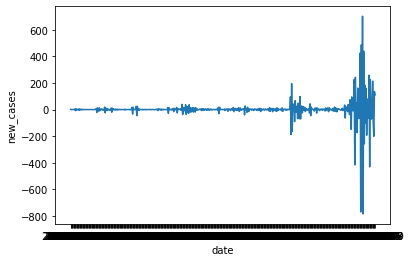

In [78]:
df_diff = da.diff().diff()
df_diff.dropna(inplace=True)
sns.lineplot(data=df_diff, x=df_diff.index, y="new_cases")

In [79]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_diff['new_cases'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -6.769165e+00
p-value                        2.669058e-09
#Lags Used                     1.900000e+01
Number of Observations Used    4.920000e+02
Critical Value (1%)           -3.443711e+00
Critical Value (5%)           -2.867432e+00
Critical Value (10%)          -2.569908e+00
dtype: float64


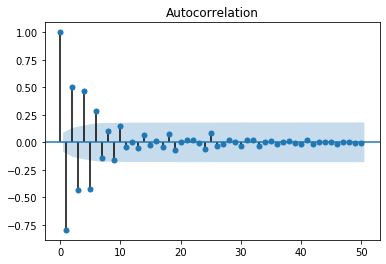

In [80]:
plt = plot_acf(df_diff, lags=50)
plt.show()

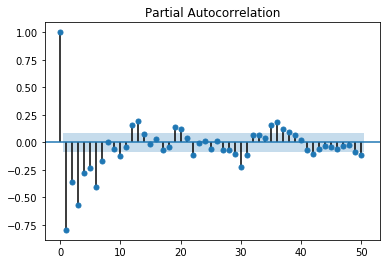

In [81]:
plt = plot_pacf(df_diff, lags=50)
plt.show()

In [83]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(da['new_cases'], ## Original Time Series
                      d=2, ## number of normal (non-seasonal) differencing
                      D=2, ## number of seasonal differencing
                      seasonal=True, 
                      m=1, ## Monthly data, so m = 12
                      trend='c',
                      start_p=0, 
                      start_q=0, 
                      test='adf', ## Augmented Dickey-Fuller test
                      stepwise=True, ## Method of search for the best model parameters
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=6000.027, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=5486.882, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=5408.008, Time=0.08 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=5183.887, Time=0.13 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=5137.190, Time=0.16 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=5109.119, Time=0.18 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=4940.364, Time=0.59 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(5,2,2)(0,0,0)[0]             : AIC=4936.317, Time=0.56 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=4951.960, Time=0.57 sec
 ARIMA(5,2,3)(0,0,0)[0]             : AIC=inf, Time=0.73 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=4943.844, Time=0.62 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept   : AIC=4936.317, Time=0.56 sec

Best model:  ARIMA(5,2,2)(0,0,0)[0] intercept
T

In [84]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  514
Model:               SARIMAX(5, 2, 2)   Log Likelihood               -2459.158
Date:                Tue, 22 Jun 2021   AIC                           4936.317
Time:                        11:51:08   BIC                           4974.462
Sample:                             0   HQIC                          4951.269
                                - 514                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0443      0.065      0.677      0.499      -0.084       0.173
ar.L1         -0.6004      0.107     -5.615      0.000      -0.810      -0.391
ar.L2         -0.3881      0.113     -3.439      0.0

In [86]:
data = da

train_size = int(0.85 * len(df))
test_size = len(df) - train_size

univariate_df = df[['date', 'new_cases']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

436 78


In [101]:
x_valid

,ds
436,2021-04-03
437,2021-04-04
438,2021-04-05
439,2021-04-06
440,2021-04-07
...,...
509,2021-06-15
510,2021-06-16
511,2021-06-17
512,2021-06-18


In [87]:
model = ARIMA(y_train, order=(5, 2, 2))
model_fit = model.fit(disp=0) 
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  434
Model:                 ARIMA(5, 2, 2)   Log Likelihood               -1556.366
Method:                       css-mle   S.D. of innovations              8.647
Date:                Tue, 22 Jun 2021   AIC                           3130.732
Time:                        11:52:41   BIC                           3167.389
Sample:                             2   HQIC                          3145.201
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.001     -0.085      0.932      -0.003       0.003
ar.L1.D2.y    -0.9675      0.337     -2.868      0.004      -1.629      -0.306
ar.L2.D2.y    -0.3969      0.275     -1.442      0.1

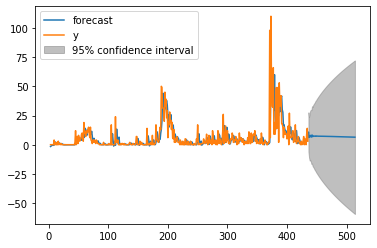

In [99]:
model_fit.plot_predict(start=3, end=len(df))
plt.show()